In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='charges', ylabel='region'>

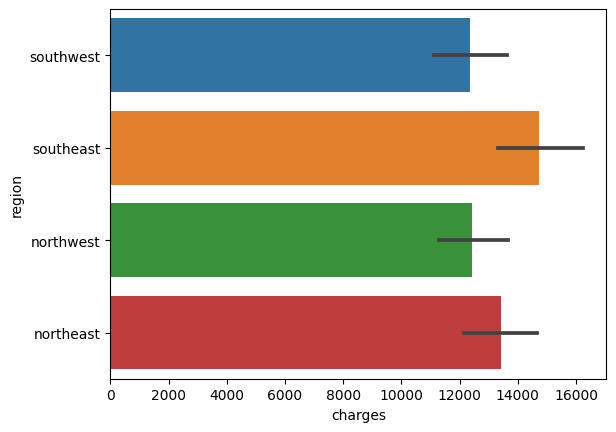

In [8]:
sns.barplot(x='charges', y='region', data=df)

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [10]:
df = pd.get_dummies(df,columns=["region"],drop_first=True)
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])

In [11]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


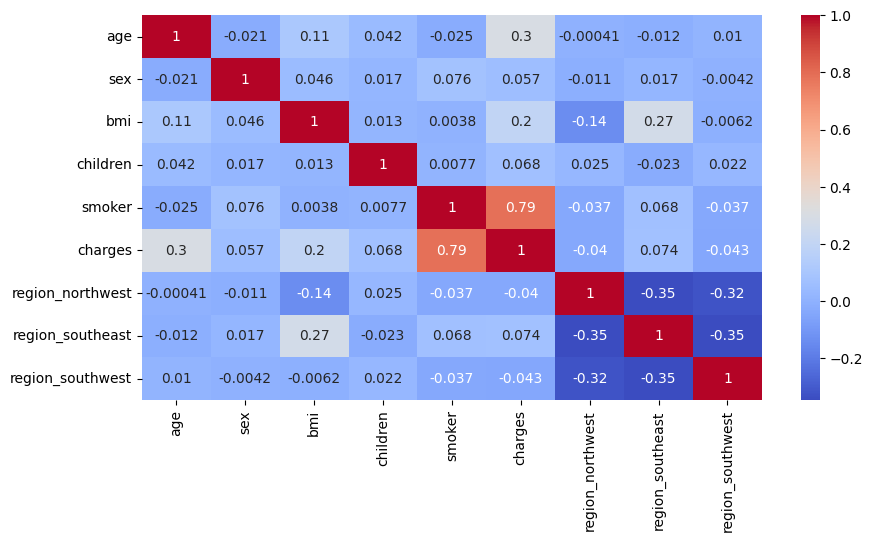

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True, cmap='coolwarm')
plt.show()

- Smoker is highly correlating with Charges
- Region is negatively correlated with Charges

In [13]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


### Model Training & Evaluation

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [15]:
X = df.drop(['charges'], axis=1)
Y = df['charges']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

#### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
model.coef_

array([  249.49034882,   130.49047436,   321.3385484 ,   443.3410947 ,
       23653.04500495,   277.82314541,  -951.71989691, -1454.59900319])

In [20]:
y_pred = model.predict(x_test)

In [21]:
print("R-squared score : ", r2_score(y_test, y_pred))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

R-squared score :  0.7451617763880103
Mean Absolute Error :  4527.966982567236
Mean Squared Error :  43013342.878894
